In [1]:
from sklearn.datasets import load_wine

X, y = load_wine(as_frame=True, return_X_y=True)

In [2]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# Convertimos el problema a clasificacion binaria
# Para mentimos un poquito y cambiamos todas las clases "2" por clases "0"

y[y == 2] = 0

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Juga con max_depth!
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

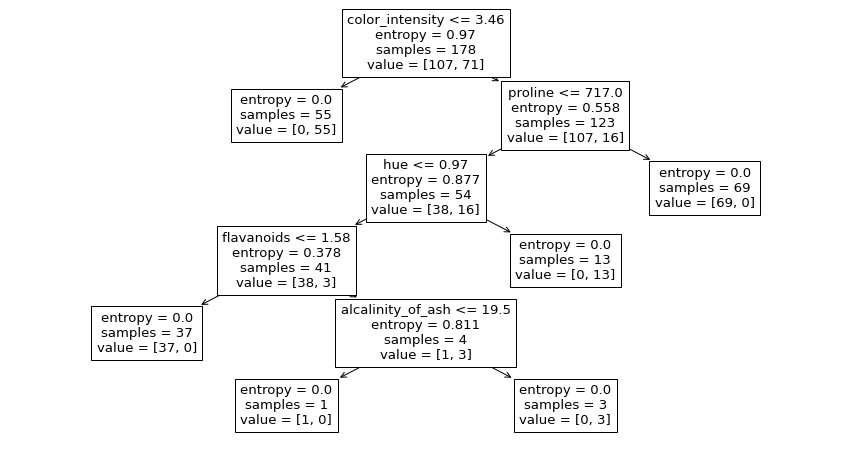

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns);

In [8]:

plt.boxplot?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

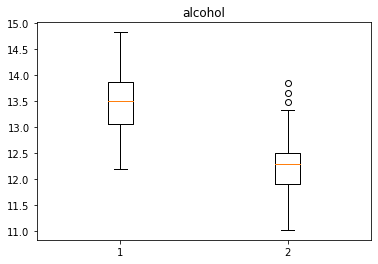

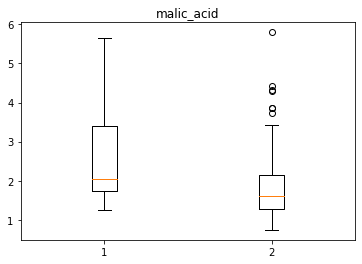

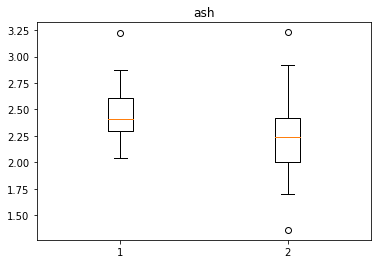

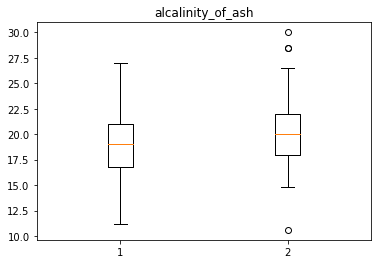

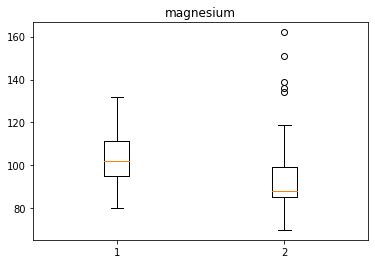

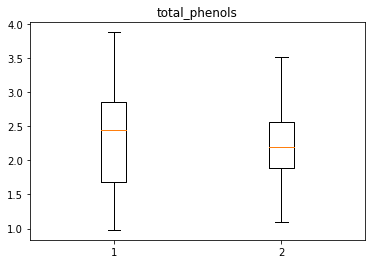

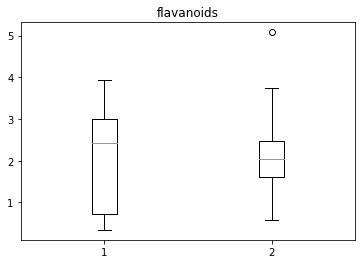

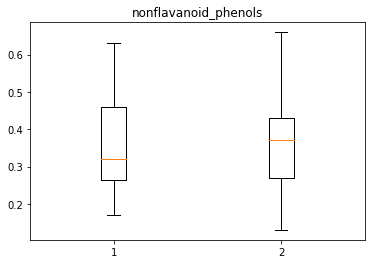

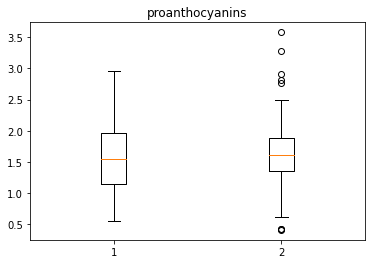

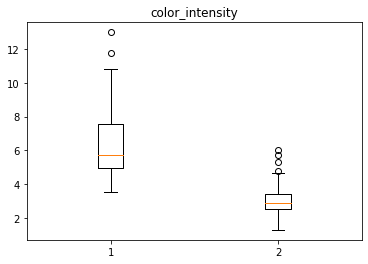

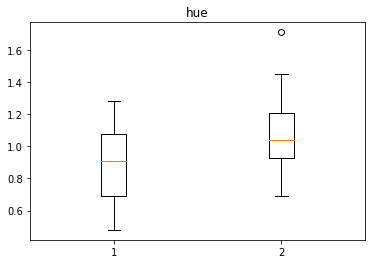

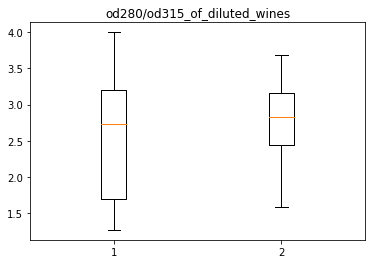

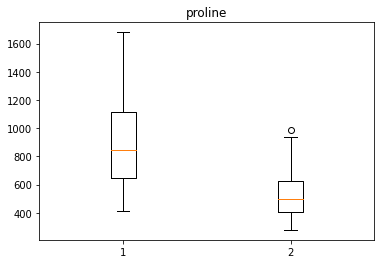

In [9]:
# Vemos como se ven las distribuciones de las features en cada clase
# Con esto podemos darnos una idea de por qué el decision tree prioriza una por sobre la otra

for col in X.columns:
    col_vals = []
    for y_val in [0, 1]:
        col_vals.append(X[col][y == y_val])

    plt.figure()
    plt.title(col)
    plt.boxplot(col_vals)

## Miremos algunas metricas

Aprovechemos para jugar y ver como cambiar el max_depth mas arriba impacta en las metricas

In [10]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score

In [11]:
preds = dt.predict(X)

preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
f1_score(y, dt.predict(X))

1.0

In [13]:
prec = precision_score(y, dt.predict(X))
prec

1.0

In [14]:
rec = recall_score(y, dt.predict(X))
rec

1.0

In [15]:
# Solo para ver, efectivamente f1 es la ecuacion que vimos en clase?

2 * prec * rec / (prec + rec)

1.0

In [16]:
y_score = dt.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)

In [17]:
# El decision tree tiene pocos scores (tantos scores como hojas)
# Podes ver que los scores se pueden calcular a partir del vector que dice "values" en la visualizacion mas arriba

set(y_score)

{0.0, 1.0}

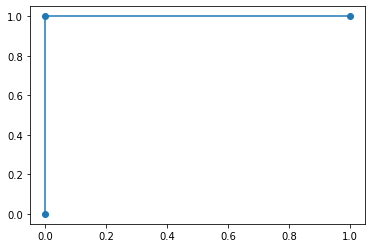

In [18]:
# Miramos la curva ROC

plt.plot(fpr, tpr, '-o')

In [19]:
roc_auc_score(y, y_score)

1.0

👆 cual es la probabilidad de ordenar bien 2 ejemplos al azar

score(ejemplo1) > score(ejemplo2) 

y_1 = 1, y_2 = 0

Ver http://madrury.github.io/jekyll/update/statistics/2017/06/21/auc-proof.html

# Regresion logística

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
lr.fit(X, y); 

In [36]:
preds = lr.predict(X)

In [37]:
f1_score(y, preds)

0.9352517985611511

In [38]:
prec = precision_score(y, preds)
prec

0.9558823529411765

In [39]:
rec = recall_score(y, preds)
rec

0.9154929577464789

In [40]:
2 * prec * rec / (prec + rec)

0.9352517985611511

In [41]:
import seaborn as sns

y_score = lr.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)

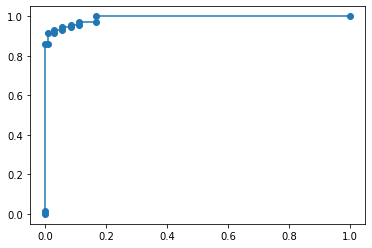

In [42]:
plt.plot(fpr, tpr, '-o')

In [43]:
roc_auc_score(y, y_score)

0.9907858365144135